In [254]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle

In [223]:
df = pd.read_csv('anemia_dataset.csv')

In [224]:
df

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,monoara,43.2870,30.6972,26.0158,12.4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,Anik,49.9999,29.2860,20.7141,14.5,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,101,Haradhan,42.2324,30.6757,27.0919,6.3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,102,arefa,45.6064,31.9084,22.4852,12.7,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,103,diluara,45.2095,29.2769,25.5136,13.4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
df.isnull().sum()

Number            0
Name              0
%Red Pixel        0
%Green pixel      0
%Blue pixel       0
Hb                0
Anaemic           0
Unnamed: 7      104
Unnamed: 8      104
Unnamed: 9      104
Unnamed: 10     104
Unnamed: 11     104
Unnamed: 12     104
Unnamed: 13     103
dtype: int64

In [226]:
df.columns

Index(['Number', 'Name', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [227]:
df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Number', 'Name'], axis = 1, inplace = True)

In [228]:
df

,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,43.2555,30.8421,25.9025,6.3,Yes
1,45.6033,28.1900,26.2067,13.5,No
2,45.0107,28.9677,26.0215,11.7,No
3,44.5398,28.9899,26.4703,13.5,No
4,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...
99,49.9999,29.2860,20.7141,14.5,Yes
100,42.2324,30.6757,27.0919,6.3,Yes
101,45.6064,31.9084,22.4852,12.7,No
102,45.2095,29.2769,25.5136,13.4,No


In [229]:
df.rename(columns = {'%Red Pixel' : 'Red Pixel', 
                     '%Green pixel' : 'Green Pixel', 
                     '%Blue pixel' : 'Blue Pixel'}, inplace = True)

In [230]:
df

,Red Pixel,Green Pixel,Blue Pixel,Hb,Anaemic
0,43.2555,30.8421,25.9025,6.3,Yes
1,45.6033,28.1900,26.2067,13.5,No
2,45.0107,28.9677,26.0215,11.7,No
3,44.5398,28.9899,26.4703,13.5,No
4,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...
99,49.9999,29.2860,20.7141,14.5,Yes
100,42.2324,30.6757,27.0919,6.3,Yes
101,45.6064,31.9084,22.4852,12.7,No
102,45.2095,29.2769,25.5136,13.4,No


In [231]:
df['Anaemic'].unique()

array(['Yes', 'No'], dtype=object)

In [232]:
df['Anaemic'].value_counts()

Anaemic
No     78
Yes    26
Name: count, dtype: int64

In [233]:
df['Anaemic']=np.where(df['Anaemic'].str.contains("No"),0,1)

In [234]:
df

,Red Pixel,Green Pixel,Blue Pixel,Hb,Anaemic
0,43.2555,30.8421,25.9025,6.3,1
1,45.6033,28.1900,26.2067,13.5,0
2,45.0107,28.9677,26.0215,11.7,0
3,44.5398,28.9899,26.4703,13.5,0
4,43.2870,30.6972,26.0158,12.4,0
...,...,...,...,...,...
99,49.9999,29.2860,20.7141,14.5,1
100,42.2324,30.6757,27.0919,6.3,1
101,45.6064,31.9084,22.4852,12.7,0
102,45.2095,29.2769,25.5136,13.4,0


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Red Pixel    104 non-null    float64
 1   Green Pixel  104 non-null    float64
 2   Blue Pixel   104 non-null    float64
 3   Hb           104 non-null    float64
 4   Anaemic      104 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 3.8 KB


In [236]:
X = df.drop('Anaemic', axis = 1)
y = df['Anaemic']

In [237]:
X

,Red Pixel,Green Pixel,Blue Pixel,Hb
0,43.2555,30.8421,25.9025,6.3
1,45.6033,28.1900,26.2067,13.5
2,45.0107,28.9677,26.0215,11.7
3,44.5398,28.9899,26.4703,13.5
4,43.2870,30.6972,26.0158,12.4
...,...,...,...,...
99,49.9999,29.2860,20.7141,14.5
100,42.2324,30.6757,27.0919,6.3
101,45.6064,31.9084,22.4852,12.7
102,45.2095,29.2769,25.5136,13.4


In [238]:
y

0      1
1      0
2      0
3      0
4      0
      ..
99     1
100    1
101    0
102    0
103    0
Name: Anaemic, Length: 104, dtype: int32

In [239]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [240]:
X_train.shape,X_test.shape

((83, 4), (21, 4))

In [241]:
X_train

,Red Pixel,Green Pixel,Blue Pixel,Hb
55,46.2133,28.3358,25.4509,13.0
22,43.3019,29.8285,26.8697,12.1
76,49.5899,28.9754,21.4347,9.9
44,44.1868,28.9764,26.8368,14.1
72,52.9108,26.7881,20.3010,11.5
...,...,...,...,...
71,41.1330,32.3681,26.4989,10.0
14,46.9942,26.0496,26.9562,14.6
92,49.5037,26.7716,23.7246,14.5
51,44.0418,28.5164,27.4418,11.9


In [242]:
y_train

55     0
22     0
76     1
44     0
72     0
      ..
71     1
14     0
92     0
51     0
102    0
Name: Anaemic, Length: 83, dtype: int32

In [243]:
X_train.corr()

,Red Pixel,Green Pixel,Blue Pixel,Hb
Red Pixel,1.000000,-0.699730,-0.838469,0.373222
Green Pixel,-0.699730,1.000000,0.197386,-0.591398
Blue Pixel,-0.838469,0.197386,1.000000,-0.061026
Hb,0.373222,-0.591398,-0.061026,1.000000


<Axes: >

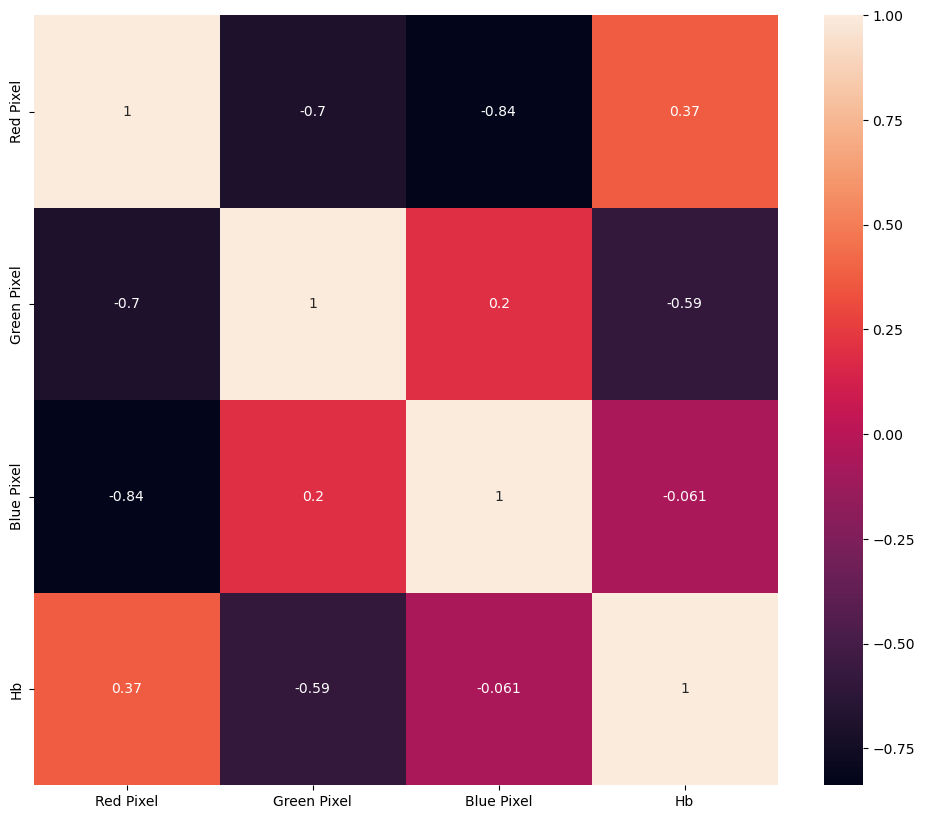

In [244]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [245]:
# z score normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [246]:
from sklearn.linear_model import LogisticRegression

In [247]:
logistic = LogisticRegression()

In [248]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [249]:
y_pred = logistic.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [250]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [251]:
score = accuracy_score(y_test, y_pred)
print(score)
print('\n\n')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\n\n')
print(classification_report(y_test, y_pred))

1.0



[[16  0]
 [ 0  5]]



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [252]:
scaler

StandardScaler()

In [253]:
logistic

LogisticRegression()

In [256]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(logistic, open('logistic.pkl', 'wb'))